In [ ]:
!git clone https://github.com/lo1gr/medical_document_clustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pickle
patents2017 = pickle.load( open( "/content/drive/My Drive/2017Pharma.pkl", "rb" ) )

In [ ]:
import pandas as pd

data_items = patents2017.items()
data_list = list(data_items)

df = pd.DataFrame(data_list)

df.head()

In [ ]:
print(df.shape)

In [ ]:
df.columns = ["id","description"]

In [ ]:
df.head()

In [ ]:
df.to_excel('/content/drive/My Drive/patents2017CSV2.xlsx')

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/My Drive/patents2017CSV2.xlsx')

In [ ]:
df.drop(df.columns[0], axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
# Import stopwords with nltk.

import nltk
import re
from nltk.corpus import stopwords


In [ ]:
stop = stopwords.words('english')
stop.append('\n')
print(stop)

In [ ]:
print(df)

In [ ]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['desc_no_stopwords'] = df['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

In [ ]:
df.to_excel('/content/drive/My Drive/patents2017CSVNoStopwords.xlsx')

In [ ]:
print(df['desc_no_stopwords'])

In [ ]:
df['desc_no_stopwords'].to_csv('/content/drive/My Drive/patents2017DescOnlyNoStopwords.csv')
df['desc_no_stopwords'].to_csv('/content/drive/My Drive/patents2017DescOnlyNoStopwordsNoNumbers.csv', index=False)

In [ ]:
df['desc_no_stopwords'].to_csv('/content/drive/My Drive/patents2017DescOnlyNoStopwordsNoNumbers.csv', index=False)

In [ ]:
!git clone https://github.com/lo1gr/medical_document_clustering.git

In [ ]:
print("hello")

hello


In [ ]:
# Libraries
import pandas as pd

In [ ]:
!pip install bert-embedding

In [ ]:
from drive.MyDrive.medical_document_clustering.embeddings import Bert, BioWordVec, ELMo, GoogleSentence, Word2Vec

In [ ]:
#from drive.MyDrive.medical_document_clustering.repository.preprocessing import launch_preprocessing

In [ ]:
from drive.MyDrive.medical_document_clustering.modeling import KMeansModel, DBSCANModel, AffinityPropagationModel, BirchModel, OPTICSModel, ClusterLabelsCombiner

In [ ]:
random_state = 42

In [ ]:
#abstracts_path='/content/drive/My Drive/patents2017DescOnlyNoStopwordsNoNumbers.csv'

In [ ]:
def embed_abstracts(abstracts, embedding_type):

    model = None

    if embedding_type == "word2vec":
        model = Word2Vec()
        vectors, output_format = model.embed_text(abstracts.nouns_lemmatized_text)

    elif embedding_type == "biowordvec":
        model = BioWordVec()
        vectors, output_format = model.embed_text(abstracts.nouns_lemmatized_text)

    elif embedding_type == "google_sentence":
        model = GoogleSentence()
        vectors, output_format = model.embed_text(abstracts.sentence_tokens)

    elif embedding_type == "elmo":
        model = ELMo()
        vectors, output_format = model.embed_text(abstracts.nouns_lemmatized_text.apply(" ".join))

    elif embedding_type == "bert":
        model = Bert()
        vectors, output_format = model.embed_text(abstracts.nouns_lemmatized_text.apply(" ".join))

    else:
        raise Exception("Embedding type should be word2vec, biowordvec, google_sentence, elmo or bert")

    return vectors, output_format, model


In [ ]:
import pandas as pd

In [ ]:
abstracts = pd.read_excel('/content/drive/My Drive/patents2017CSVNoStopwords.xlsx')

In [ ]:
abstracts.drop(abstracts.columns[0], axis=1, inplace=True)

In [ ]:
abstracts.drop(abstracts.columns[1], axis=1, inplace=True)

In [ ]:
abstracts.head()

In [ ]:
abstracts.rename(columns={"desc_no_stopwords": "text", "id":"title"})

In [ ]:
abstracts2 = abstracts[abstracts.columns[[1,0]]]

In [ ]:
abstracts = abstracts2

In [ ]:
abstracts.head()

In [ ]:
abstracts = abstracts.rename(columns={"desc_no_stopwords": "text", "id":"title"})

In [ ]:
print("hello")

In [ ]:
[1]*10**10

In [ ]:
abstracts = pd.read_excel('/content/drive/My Drive/patentsFinalDataClustering.xlsx')

In [ ]:
abstracts.head()

In [ ]:
#abstracts.to_excel(r'/content/drive/My Drive/patentsFinalDataClustering.xlsx', index = False)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

In [ ]:
#abstracts = launch_preprocessing(abstracts)

In [ ]:
# Libraries

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer
import pandas as pd
import os
from nltk import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag


# Mandatory downloads


def nltk_package_downloads():
    """
    function that calls necessary downloads
    """
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')


def stopword_list(prep_type):
    """
    :param prep_type: a string containing the type of preproceesing, i.e. "title" or "text"
    :return: a list with stopwords
    """
    # stopwords + lowercase
    normal_stopwords = ["a", "the"]

    #     import more extensive stopwords + convert to list the first column
    comprehensive_stopwords = pd.read_csv('/content/drive/MyDrive/medical_document_clustering/stopwords/stopwords-en.txt', header=None)[0].tolist()

    #     potential further stopwords (will have to test that)
    special_medical = ["complex", "patients", "treatment", "months",
                       "rate", "prevalence", "case", "early", "management", "data", "factors",
                       "reported", "information", "baseline", "study", "questionnaire", "results", "month", "months",
                       "years", "year", "status", "type", "cells", "cell", "nan",
                        "among", "clinical", "associated", "hospital", "care", "age", "iii", " ", "  ",
                       "january", "february", "march", "april", "may", "june", "july", "august", "september", "october",
                       "november", "december"]

    if prep_type == "text":
        stopW = normal_stopwords + comprehensive_stopwords + special_medical
        # for the title, we also want to remove individual special words
    else:
        stopW = normal_stopwords + special_medical + comprehensive_stopwords

    return stopW


# word preprocessing
def preprocessing_sentence(column):
    """
    :param column: column to preprocess
    :return: a pre-processed column
    """

    # Tokenization
    tokens = sent_tokenize(str(column))

    tokens = [token.lower().strip() for token in tokens]

    # Deleting specific characters
    special_characters = ["@", "/", "#", ".", ",", "!", "?", "(", ")",
                          "-", "_", "’", "'", "\"", ":", "=", "+", "&",
                          "`", "*", "0", "1", "2", "3", "4", "5",
                          "6", "7", "8", "9", "'", '.', '‘', ';', "%"]
    transformation_sc_dict = {initial: "" for initial in special_characters}
    tokens = [token.translate(str.maketrans(transformation_sc_dict)) for token in tokens]
    return ".".join(tokens)


def preprocessing_words(column, prep_type):
    """
    :param column: column to preprocess
    :param prep_type: a string containing the type of preprocessing, i.e. "title" or "text"
    :return: a pre-processed column
    """

    # Tokenization
    tokens = word_tokenize(str(column))

    # Deleting words with  only one or 2 caracter
    tokens = [token.strip() for token in tokens if len(token.strip()) > 3 and token.find(' ') == -1 and token.find('  ') == -1]


    # Deleting specific characters
    special_characters = ["@", "/", "#", ".", ",", "!", "?", "(", ")",
                          "-", "_", "’", "'", "\"", ":", "=", "+", "&",
                          "`", "*", "0", "1", "2", "3", "4", "5",
                          "6", "7", "8", "9", "'", '.', '‘', ';', '\t']
    transformation_sc_dict = {initial: " " for initial in special_characters}
    tokens = [token.translate(str.maketrans(transformation_sc_dict)) for token in tokens]

    # deleting stopwords
    stopW = stopword_list(prep_type)

    tokens = [token.lower() for token in tokens if token.lower() not in stopW]
    return tokens


def lemmatization(tokenized_column):
    """
    :param tokenized_column: a column of a dataframe that is tokenized
    :return: lemmatized list
    """
    # Lemmatization:
    wnl = WordNetLemmatizer()

    tags = [pos_tag(token) for token in tokenized_column]
    # initialized lemmatizred list:
    lemmatized = []
    nouns_list = []

    for list in tags:
        # initialize empty intermediary liust
        result = []
        nouns = []
        for word, tag in list:
            if word != '    ' and word != '     ' and word != ' ' and word != '  ' and\
                    word != 'p       ' and word!= 'p     ' and word != 'p    ' and word != 'p   ':
                if tag.startswith("NN"):
                    result.append(wnl.lemmatize(word, pos='n'))
                    nouns.append(wnl.lemmatize(word, pos='n'))
                elif tag.startswith("VB"):
                    result.append(wnl.lemmatize(word, pos='v'))
                elif tag.startswith("JJ"):
                    result.append(wnl.lemmatize(word, pos='a'))
                    nouns.append(wnl.lemmatize(word, pos='a'))
                elif tag.startswith("R"):
                    result.append(wnl.lemmatize(word, pos='r'))
                else:
                    result.append(word)
        lemmatized.append(result)
        nouns_list.append(nouns)

    return lemmatized, nouns_list


def detokenize(df_tokens, name_token_column):
    """
    :param df_tokens: dataframe with a tokenized column that will be detokenized
    :param name_token_column: string with the name of the column holding the tokenized data
    :return: the same dataframe with an additional detokenized column called "detokenized"
    the detokenization turns [early, phase, trials, institut, oncology] into early phase therapeutic trials oncology
    """
    df_tokens["detokenized"] = df_tokens[name_token_column].apply(TreebankWordDetokenizer().detokenize)
    return df_tokens


def launch_preprocessing2(df):
    """
    :return: a dataframe containing a title and a text column with strings that will be preprocessed (standard NLP preprocessing)
    :return: a preproceessed data frame
    """
    df = df.rename(columns={"Tiltle": "title"})
    df = df.dropna(subset=['text', 'title'])

    df["word_tokens"] = df["text"].apply(preprocessing_words, args=["text"])
    df["sentence_tokens"] = df["text"].apply(preprocessing_sentence)
    df["title_clean"] = df["title"].apply(preprocessing_words, args=["title"])

    #lemmatize:
    df["word_tokens_lemmatized"], df["nouns_lemmatized_text"] = lemmatization(df["word_tokens"])
    df["title_clean_lemmatized"], df["nouns_lemmatized_title"] = lemmatization(df["title_clean"])

    final = detokenize(df, "word_tokens")

    return final


# comprehensive_stopwords = pd.read_csv('stopwords/stopwords-en.txt', header=None)[0].tolist()

# comprehensive_stopwords


def load_data(abstracts_path, with_preprocess=True):
    """
    :param abstracts_path: Path to preprocessed or not abstracts dataset
    :param with_preprocess: Boolean to specify if we should apply preprocess pipeline
    :return: abstracts dataset preprocessed
    """
    abstracts = pd.read_excel(abstracts_path)

    if with_preprocess:

        abstracts = launch_preprocessing(abstracts)

    return abstracts



#abstracts = pd.read_excel('data/CS2_Article_Clustering.xlsx', index=False)
#abstracts = launch_preprocessing(abstracts)

# abstracts.to_csv('data/abstracts_preproc.csv', index=False)

In [ ]:
abstracts = launch_preprocessing2(abstracts)

In [ ]:
abstracts.head()

In [ ]:
abstracts.head()

In [ ]:
abstracts.to_pickle("/content/drive/My Drive/patentsFinalDataClusteringLemmatized.pkl")

In [ ]:
import pandas as pd

In [ ]:
abstracts = pd.read_pickle("/content/drive/My Drive/patentsFinalDataClusteringLemmatized.pkl")

In [ ]:
abstracts2 = pd.read_pickle("/content/drive/MyDrive/claims_p.pkl")

In [ ]:
abstracts2.head()

In [ ]:
abstracts.head()

,text,title,word_tokens,sentence_tokens,title_clean,word_tokens_lemmatized,nouns_lemmatized_text,title_clean_lemmatized,nouns_lemmatized_title,detokenized
0,DESCRIPTION OF EMBODIMENTS One embodiment pres...,9532519,"[description, embodiments, embodiment, referen...",description of embodiments one embodiment pres...,[ ],"[description, embodiment, embodiment, referenc...","[description, embodiment, embodiment, referenc...",[ ],[ ],description embodiments embodiment reference a...
1,The following non-limiting Examples describe u...,9532520,"[non limiting, examples, slpp c , genes, modif...",the following nonlimiting examples describe us...,[ ],"[non limiting, example, slpp c , gene, modify,...","[example, gene, plant, phenotype, example, tec...",[ ],[ ],non limiting examples slpp c genes modifying ...
2,DETAILED DESCRIPTION OF THE INVENTION In one e...,9532523,"[detailed, description, embodiment, edible, be...",detailed description of the invention in one e...,[ ],"[detailed, description, embodiment, edible, be...","[detailed, description, embodiment, edible, be...",[ ],[ ],detailed description embodiment edible bean de...
3,DETAILED DESCRIPTION OF THE INVENTION In descr...,9532524,"[detailed, description, description, tables, f...",detailed description of the invention in descr...,[ ],"[detailed, description, description, table, fo...","[detailed, description, description, table, te...",[ ],[ ],detailed description description tables follow...
4,DETAILED DESCRIPTION OF THE INVENTION In descr...,9532525,"[detailed, description, description, tables, f...",detailed description of the invention in descr...,[ ],"[detailed, description, description, table, fo...","[detailed, description, description, table, te...",[ ],[ ],detailed description description tables follow...


In [ ]:
# Libraries

import pandas as pd
import numpy as np
from gensim.models.keyedvectors import KeyedVectors
from drive.MyDrive.medical_document_clustering.embeddings import embedder as Embedder


class BioWordVec(Embedder.embedder):

    def __init__(self):
        super().__init__('biowordvec')

        self.output_format = {
            'n_cols': 200
        }

        self.trained_model = '/content/drive/MyDrive/medical_document_clustering/embeddings/bio_embedding_extrinsic'

        self.model = KeyedVectors.load_word2vec_format(self.trained_model, binary=True)

    # Core functions

    def get_vect(self, word):
        """
        :param word: word to be embedded
        :param model: model used to embed a word
        :return: word vector
        """
        try:
            return self.model.get_vector(word)
        except KeyError:
            return np.zeros((self.model.vector_size,))

    def sum_vectors(self, sentence):
        """
        :param sentence: sentence to be embedded
        :param model: model used to embed a word
        :return: vector
        """
        return sum(self.get_vect(w) for w in sentence)

    def word2vec_features(self, sentences):
        """
        :param sentences: sentences to be embedded
        :param model: model used to embed a word
        :return: numpy list of list
        """
        feats = np.vstack([self.sum_vectors(p) for p in sentences])
        return feats

    def embed_text(self, abstracts):
        """
        :param abstracts: pandas Series of abstracts
        :param output_format: dict specifying output format of the embedding method
        :return: embedding and associated format
        """

        embedding = pd.DataFrame(self.word2vec_features(abstracts))

        return embedding, self.output_format


In [ ]:
trained_model = '/content/drive/MyDrive/medical_document_clustering/embeddings/bio_embedding_extrinsic'

In [ ]:
model = KeyedVectors.load_word2vec_format(trained_model, binary=True)

In [ ]:
vectors_biowordvec, output_format_biowordvec, model_biowordvec = embed_abstracts(abstracts, "biowordvec")

In [ ]:
vectors_biowordvec.head()

In [ ]:
# Libraries

import pandas as pd
from bert_embedding import BertEmbedding

from drive.MyDrive.medical_document_clustering.embeddings import embedder as Embedder


class Bert(Embedder.embedder):

    def __init__(self):
        super().__init__('bert')

        self.output_format = {
            'n_cols': 768
        }

        self.model = BertEmbedding(model='bert_12_768_12', dataset_name='book_corpus_wiki_en_uncased')

    # Core functions

    def embed_text(self, abstracts):
        """
        :param abstracts: pandas Series of abstracts
        :param output_format: dict specifying output format of the embedding method
        :return: embedding and associated format
        """
        bert_embedding = self.model.bert(abstracts.tolist())

        embedding = []

        for _, vectors in bert_embedding:
            embedding.append(sum(vectors))

        embedding = pd.DataFrame(embedding)

        return embedding, self.output_format


In [ ]:
vectors_bert, output_format_bert, model_bert = embed_abstracts(abstracts, "bert")

In [ ]:
# Libraries
import itertools
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cosine


class ClusteringModel:

    def __init__(self, model_type):
        self.model_type = model_type
        self.model = KMeans(n_clusters=15)
        self.random_state = 42

    def set_model_parameters(self, **params):
        self.model.set_params(**params)
        return self

    def perform_clustering(self, features, **params):
        self.model.fit(features, **params)

        return pd.concat(
            [
                features,
                pd.DataFrame(
                    [i for i in self.model.predict(features)],
                    columns=('cluster',))
            ],
            axis=1
        )

    def label_clusters(self, clusters, abstracts):
        """
        :param clusters: df with clusters
        :param abstracts: df with all the information
        :return labelled clusters
        """

        clusters["nouns_lemmatized_title"] = abstracts.title
        clusters["nouns_lemmatized_text"] = abstracts.nouns_lemmatized_text.values
        clusters["category"] = abstracts.title

        for k in range(len(pd.unique(clusters.cluster))):
            cluster = clusters.loc[clusters.cluster == k, :]
            words = [y for x in itertools.chain(cluster.nouns_lemmatized_title) for y in x]
            most_common_words = Counter(words).most_common(5)
            print(k)
            print(most_common_words)
            most_common_words = [word[0] for word in most_common_words]
            clusters.loc[clusters.cluster == k, 'labels'] = pd.Series([most_common_words] * len(cluster)).values

        return clusters

    @staticmethod
    def evaluate_clusters(embedder, labelled_clusters):

        embedded_category = np.array(embedder.embed_text(labelled_clusters.nouns_lemmatized_text)[0])
        embedded_labels = np.array(embedder.embed_text(labelled_clusters.labels)[0])

        similarity_vector = []

        for i in range(len(embedded_labels)):
            similarity_vector.append(cosine(embedded_category[i], embedded_labels[i]))

        return np.sqrt(sum([a ** 2 for a in similarity_vector]) / len(similarity_vector))

    def plot_elbow(self, features, range):
        inertia = []

        for r in range:
            self.model.set_params(n_clusters=r)
            self.model.fit(features)
            inertia.append(self.model.inertia_)

        plt.plot(range, inertia)
        plt.show()

    def plot_from_pca(self, clusters):
        """
        :param clusters: df with embedded text and associated cluster
        :return: clusters plot on two first PCA dimensions
        """

        vectors = clusters.drop(["cluster"], axis=1)

        pca = pd.DataFrame(PCA(n_components=2, random_state=self.random_state).fit_transform(
            StandardScaler().fit_transform(
                vectors
            )
        ), columns=('dim_1', 'dim_2'))

        clusters = pd.concat(
            [pca, clusters], axis=1
        )

        plt.scatter(clusters.dim_1, clusters.dim_2, c=clusters.cluster, alpha=0.8)
        plt.show()

    def nb_categories_in_clusters(self, labelled_clusters):
        return len(labelled_clusters.groupby(["cluster", "category"]).count()) / len(pd.unique(labelled_clusters.cluster))

    def concat_clusters_with_abstracts_information(self, clusters, abstracts, columns):
        return pd.concat([clusters, abstracts[columns]], axis=1)


In [ ]:
# Libraries


from sklearn.cluster import KMeans


class KMeansModel(ClusteringModel):

    def __init__(self, n_clusters=15):
        super().__init__('kmeans')

        self.model = KMeans(n_clusters=n_clusters, random_state=self.random_state)


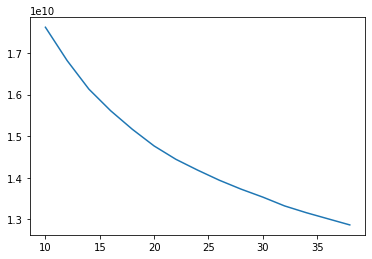

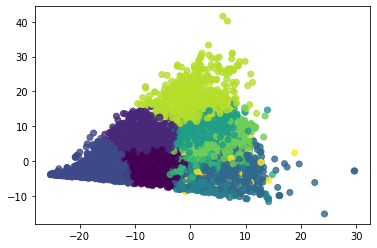

TypeError: ignored

In [ ]:
n_clusters = 2
#try less clusters
#2 to distinguish pharma and biotech for the claims data 75k

model_kmeans = KMeansModel(n_clusters=n_clusters)

model_kmeans.plot_elbow(features=vectors_biowordvec, range=range(10, 40, 2))

model_kmeans = model_kmeans.set_model_parameters(n_clusters=n_clusters)
clusters = model_kmeans.perform_clustering(features=vectors_biowordvec)
model_kmeans.plot_from_pca(clusters=clusters)


labelled_clusters = model_kmeans.label_clusters(clusters=clusters, abstracts=abstracts)

rmse_kmeans = KMeansModel.evaluate_clusters(embedder=model_biowordvec, labelled_clusters=labelled_clusters)

model_kmeans.nb_categories_in_clusters(labelled_clusters=labelled_clusters)

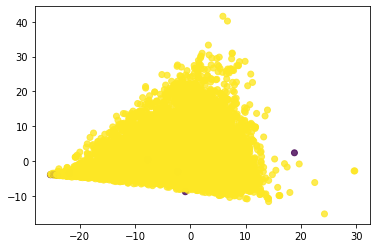

AttributeError: ignored

In [ ]:
eps = 0.1
min_samples = 5

model_dbscan = DBSCANModel(eps=eps, min_samples=min_samples, metric="cosine")

clusters = model_dbscan.perform_clustering(features=vectors_biowordvec)
model_dbscan.plot_from_pca(clusters=clusters)

labelled_clusters = model_dbscan.label_clusters(clusters=clusters, abstracts=abstracts)

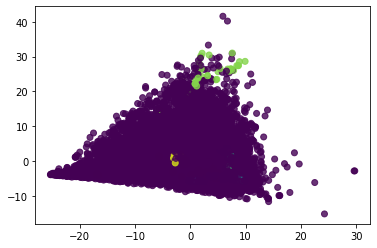

AttributeError: ignored

In [ ]:
min_samples = 20

model_optics = OPTICSModel(min_samples=min_samples,  metric="cosine")

clusters = model_optics.perform_clustering(features=vectors_biowordvec)
model_optics.plot_from_pca(clusters=clusters)

labelled_clusters = model_optics.label_clusters(clusters=clusters, abstracts=abstracts)